In [1]:
import numpy as np

In [2]:
# generate two filters
np.random.seed(42)
width = 5

filters = np.random.rand(2, width)
weights_sum = np.sum(filters, axis=1, keepdims=True)
filters /= weights_sum

print(f"filter1 is {filters[0,:]}, filter2 is {filters[1,:]}")

filter1 is [0.13319703 0.33810082 0.26031769 0.21289984 0.05548463], filter2 is [0.06528492 0.02430844 0.36250145 0.25157131 0.29633388]


In [3]:
def relu(x):
    """
    ReLU activation function
    """
    return np.maximum(0, x)

In [4]:
def conv1d_forward_pass(x, filters, width):
    """
    Forward pass of 1D convolution with ReLU activation
    
    Args:
        x: Input of shape (3, T) where 3 is channels, T is time steps
        filters: Filters of shape (2, width)
        width: Kernel width
    
    Returns:
        output_flatten: Flattened output nodes
        output: Output before flattening of shape (2, T_out)
    """
    T = x.shape[1]
    
    # Output length
    T_out = T - width + 1
    
    # Initialize output
    output = np.zeros((2, T_out))
    
    # Manual calculation of 1D convolution
    for i in range(2):
        for j in range(T_out):
            ind1 = j
            ind2 = j + width
            # Apply filter to 3 channels respectively
            x_clip = x[:, ind1:ind2] * filters[i, :]
            # The resultant convolution takes the sum
            output[i, j] = np.sum(x_clip)
    
    # Activation function
    output = relu(output)
    
    # Print the shape before output
    print(f"shape of output matrix: {output.shape}\n")
    
    # Flatten into nodes
    output_flatten = output.flatten()
    print(f"number of output nodes: {output_flatten.shape}\n")
    
    return output_flatten, output


In [5]:
# Example usage
T = 100
width = 5
x = np.random.rand(3, T)
filters = np.random.rand(2, width)

output_flatten, output = conv1d_forward_pass(x, filters, width)

shape of output matrix: (2, 96)

number of output nodes: (192,)



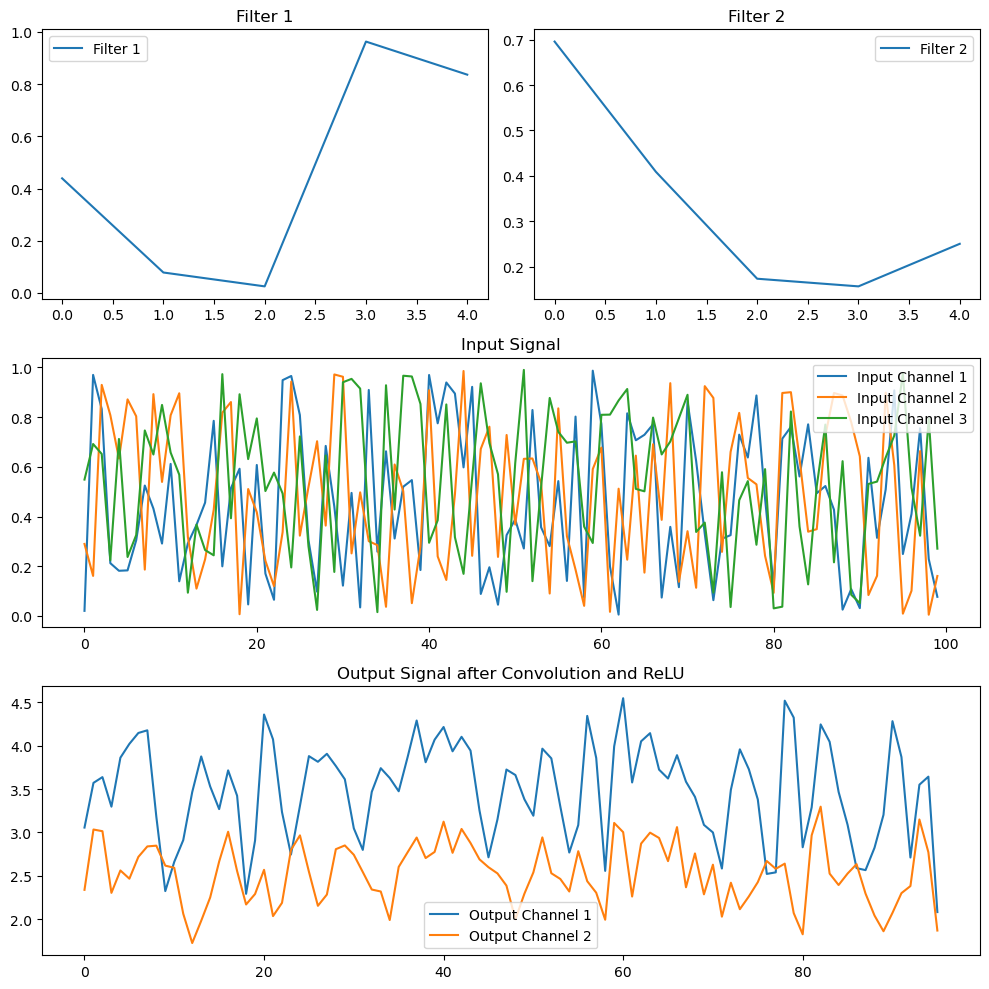

In [7]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 2, figure=fig)

# Filters side-by-side in top row
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax1.plot(filters[0, :], label='Filter 1')
ax1.set_title('Filter 1')
ax1.legend()

ax2.plot(filters[1, :], label='Filter 2')
ax2.set_title('Filter 2')
ax2.legend()

# Input signal (spans both columns)
ax3 = fig.add_subplot(gs[1, :])
for i in range(3):
    ax3.plot(x[i, :], label=f'Input Channel {i+1}')
ax3.set_title('Input Signal')
ax3.legend()

# Output signal (spans both columns)
ax4 = fig.add_subplot(gs[2, :])
ax4.plot(output[0, :], label='Output Channel 1')
ax4.plot(output[1, :], label='Output Channel 2')
ax4.set_title('Output Signal after Convolution and ReLU')
ax4.legend()

plt.tight_layout()
plt.show()